In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from torchvision.utils import save_image, make_grid

import superminddpm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [3]:
model = superminddpm.DDPM(eps_model = superminddpm.DummyEpsModel(1),
                          betas = (1e-4, 0.02),
                          n_T = 1000)
model.to(device)
model.load_state_dict(torch.load("ddpm_mnist.pth", weights_only=True, map_location=device))
model.eval()

DDPM(
  (eps_model): DummyEpsModel(
    (conv): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (1): Sequential(
        (0): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (2): Sequential(
        (0): Conv2d(128, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (3): Sequential(
        (0): Conv2d(256, 512, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [4]:
with torch.no_grad():
    ddpm_digits = model.sample(16, (1, 28, 28), device)
    grid = make_grid(ddpm_digits, nrow=4)

MIOpen(HIP): Warning [SQLiteBase] Missing system database file: gfx90878.kdb Performance may degrade. Please follow instructions to install: https://github.com/ROCmSoftwarePlatform/MIOpen#installing-miopen-kernels-package


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


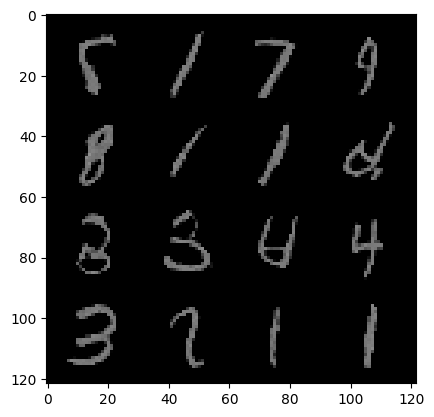

In [5]:
plt.imshow(np.array(grid.detach().cpu()).transpose(1, 2, 0))